In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## The Law of Small Numbers ##

The consecutive odds ratios of the binomial $(n, p)$ distribution help us derive an approximation for the distribution when $n$ is large and $p$ is small. The approximation is sometimes called the *law of small numbers* because it approximates the distribution of the number of successes when the chance of success is small: you only expect a small number of successes.

As an example, here is the binomial $(1000, 2/1000)$ distribution. Note that $1000$ is large, $2/1000$ is pretty small, and $1000 \times (2/1000) = 2$ is the natural number of successes to be thinking about.

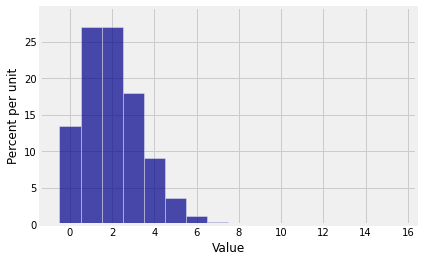

In [2]:
n = 1000
p = 2/1000
k = np.arange(16)
binom_probs = stats.binom.pmf(k, n, p)
binom_dist = Table().values(k).probabilities(binom_probs)
Plot(binom_dist)

Though the possible values of the number of successes in 1000 trials can be anywhere between 0 and 1000, the *probable* values are all rather small because $p$ is small. That is why we didn't even bother computing the probabilities beyond $k = 15$. 

Since the histogram is all scrunched up near 0, only very few bars have noticeable probability. It really should be possible to find or approximate the chances of the corresponding values by a simpler calculation than the binomial formula.

To see how to do this, we will start with $P(0)$.

### Approximating $P(0)$ ###

Remember that $np_n$ is very close to the mode of the binomial $(n, p_n)$ distribution. Now let $n \to \infty$ and $p_n \to 0$ in such a way that $np_n \to \mu > 0$. 

There are two reasons for the condition that $np_n$ converges to some positive number $\mu$.

- To ensure that $p_n$ doesn't go to $0$ so fast compared to $n$ that $np_n$ goes to $0$ as well, because in that case all the probability just gets concentrated at the possible value $0$
- To ensure that $p_n$ doesn't go to $0$ so slowly compared to $n$ that $np_n$ goes off to $\infty$, because in that case all the probability drifts off the number line into the void

Let $P_n(k)$ be the binomial $(n, p_n)$ probability of $k$ successes.

Then 

$$
P_n(0) = (1 - p_n)^n
\to e^{-\mu} ~~~ \text{as } n \to \infty
$$

One way to see the limit is to appeal to our familiar exponential approxmation:

$$
\log(P_n(0)) =
n \cdot \log \big{(} 1 - p_n \big{)} 
\sim n(-p_n)
= -np_n
\sim -\mu
$$

when $n$ is large, because $p_n \sim 0$ and $np_n \sim \mu$.

In [3]:
# VIDEO: Recursive Formula
from IPython.display import YouTubeVideo

YouTubeVideo("TmKepZHdOg0")

### Approximating $P(k)$ ###
In general, for fixed $k > 1$,

$$
\begin{align*}
P_n(k) &= P_n(k-1)R_n(k) \\ \\
&= P_n(k-1)\frac{n-k+1}{k} \cdot \frac{p_n}{1-p_n} \\ \\
&= P_n(k-1) \big{(} \frac{np_n}{k} - \frac{(k-1)p_n}{k} \big{)}
\frac{1}{1 - p_n} \\ \\
&\sim P_n(k-1) \cdot \frac{\mu}{k}
\end{align*}
$$

when $n$ is large, because $k$ is constant, $np_n \to \mu$, $p_n \to 0$, and $1-p_n \to 1$. 

For large $n$, remember that $P_n(0) \sim e^{-\mu}$. So

$$
\begin{align*}
P_n(1) ~ &\sim ~ e^{-\mu}\cdot\frac{\mu}{1} \\
P_n(2) ~ &\sim ~ P_n(1)\cdot\frac{\mu}{2} ~ \sim ~ e^{-\mu}\cdot\frac{\mu}{1}\cdot\frac{\mu}{2}
\end{align*}
$$


By induction, this implies the following approximation for each fixed $k$. 

$$
P_n(k) ~ \sim ~ e^{-\mu} \cdot \frac{\mu}{1} \cdot \frac{\mu}{2}
\cdots \frac{\mu}{k}
~ = ~ e^{-\mu} \frac{\mu^k}{k!}
$$

if $n$ is large, under all the additional conditions we have assumed. Here is a formal statement.

In [4]:
# VIDEO: Poisson Approximation

YouTubeVideo("5w1SnSOSTOo")

### Poisson Approximation to the Binomial ###
Let $n \to \infty$ and $p_n \to 0$ in such a way that $np_n \to \mu > 0$. Let $P_n(k)$ be the binomial $(n, p_n)$ probability of $k$ successes. Then for each $k$ such that $0 \le k \le n$,

$$
P_n(k) \sim e^{-\mu} \frac{\mu^k}{k!} ~~~
\text{for large } n
$$

This is called the Poisson approximation to the binomial. The parameter of the Poisson distribution is $\mu \sim np_n$ for large $n$.

The distribution is named after its originator, the French mathematician [Siméon Denis Poisson](https://en.wikipedia.org/wiki/Siméon_Denis_Poisson) (1781-1840).

```{admonition} Quick Check
Let $X$ have the binomial $(5000, 1/2000)$ distribution. What is the Poisson approximation to $P(X = 5)$?

```

```{admonition} Answer
:class: dropdown
$e^{-2.5} \frac{2.5^5}{5!}$

```

The terms in the approximation are proportional to the terms in the series expansion of $e^{\mu}$:

$$
\frac{\mu^k}{k!}, ~~ k \ge 0
$$

The expansion is infinite, but we are only going up to a finite (though large) number of terms $n$. You now start to see the value of being able to work with probability spaces that have an infinite number of possible outcomes.

We'll get to that in a later section. For now, let's see if the approximation we derived is any good.

### Poisson Probabilities in Python ###
Use `stats.poisson.pmf` just as you would use `stats.binomial.pmf`, but keep in mind that the Poisson has only one parameter.

Suppose $n = 1000$ and $p = 2/1000$. Then the exact binomial chance of 3 successes is

In [5]:
stats.binom.pmf(3, 1000, 2/1000)

0.18062773231732254

The approximating Poisson distribution has parameter $1000 \times (2/1000) = 2$, and so the Poisson approximation to the probability above is

In [6]:
stats.poisson.pmf(3, 2)

0.18044704431548356

Not bad. To compare the entire distributions, first create the two distribution objects:

In [7]:
k = range(16)

bin_probs = stats.binom.pmf(k, 1000, 2/1000)
bin_dist = Table().values(k).probabilities(bin_probs)

poi_probs = stats.poisson.pmf(k, 2)
poi_dist = Table().values(k).probabilities(poi_probs)

The `prob140` function that draws overlaid histograms is called `Plots` (note the plural). The syntax has alternating arguments: a string label you provide for a distribution, followed by that distribution, then a string label for the second distribution, then that distribution.

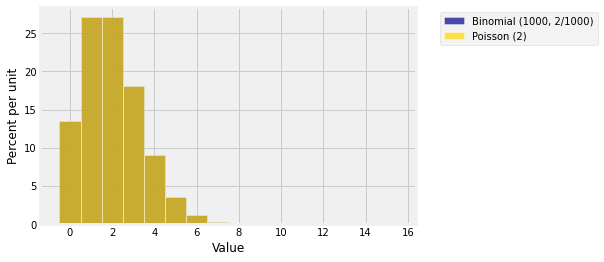

In [8]:
Plots('Binomial (1000, 2/1000)', bin_dist, 'Poisson (2)', poi_dist)

Does it look as though there is only one histogram? That's because the approximation is great! Here are the two histograms individually.

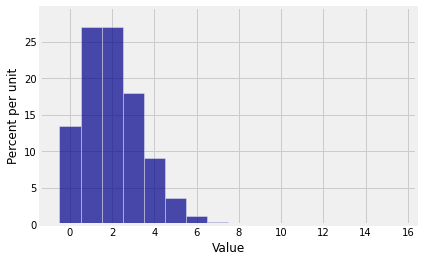

In [9]:
Plot(bin_dist)

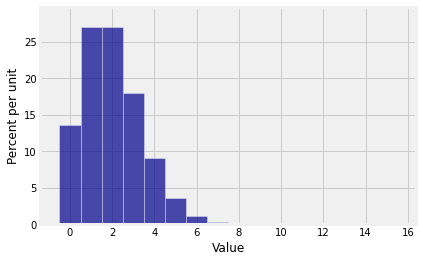

In [10]:
Plot(poi_dist)

In lab, you will use total variation distance to get a bound on the error in the approximation.

A reasonable question to ask at this stage is, "Well that's all very nice, but why should I bother with approximations when I can just use Python to compute the exact binomial probabilities using `stats.binom.pmf`?"

Part of the answer is that if a function involves parameters, you can't understand how it behaves by just computing its values for some particular choices of the parameters. In the case of Poisson probabilities, we will also see shortly that they form a powerful distribution in their own right, on an infinite set of values.